<center> <h1>Unit 9</h1> </center>
<center> <h1>Case Study 3: Credit Score Prediction with Random Forests</h1></center>
<br>
<br>
<br>
<center> <h3>IST 718 – Big Data Analytics</h3> </center>
<center> <h3>Daniel E. Acuna</h3> </center>
<center> <h3>http://acuna.io</h3> </center>

# Objectives
- The Credit Score problem.  

- Logistic regression.  

- Decision Trees.  

- The wisdom of the crowds.  

- Bagged Decision Trees.  

- Random Forest.  

- Gradient boosting.  

- Spark ML demo.

# The credit score problem
- Predict whether someone will be in financial distress.  

- Data from Kaggle: https://www.kaggle.com/c/GiveMeSomeCredit  

<div class="blockquote2">
Credit scoring algorithms, which **make a guess at the probability of default**, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by **predicting the probability that somebody will experience financial distress in the next two years**.
</div>

# The credit score problem (2)
- Predict whether someone will be in financial distress.  

- Data from Kaggle: https://www.kaggle.com/c/GiveMeSomeCredit  

<br>
<center><img src="./images/unit-09/unit-09-0_cscsrf1.png" width="80%" align="center"></center>

# The credit score problem (3) 
<br>
<center><img src="./images/unit-09/unit-09-0_cscsrf2.png" width="100%" align="center"></center>

# A problem with logistic regression
- Remember the model we are trying to learn:  

$$p(y \mid X) = \frac{1}{1 + \exp(-(\theta_0 + \sum_{j>0}{x_j\theta_j}))}$$  

- How is the boundary between classes?

# The XOR problem
- Two features, two classes, and 4 data points.  

- Can we use logistic regression to fit the exclusive-or function?  
<br>
<center><img src="./images/unit-09/unit-09-0_cscsrf3.png" width="80%" align="center"></center>

# The XOR problem (2)
- This problem created a Neural Network winter for 20 years.  

- How to solve it?  
<br>
<center><img src="./images/unit-09/unit-09-0_cscsrf3.png" width="80%" align="center"></center>

# The XOR problem (3)
- Non-linearity, more complex functions!  
<br>
<center><img src="./images/unit-09/unit-09-0_cscsrf4.png" width="80%" align="center"></center>

# Decision trees
<br>
<div class="container2">
  <div class="row2">
    <div class="col-5">
      <ul>
        <li>Decision tree recursively partitions the feature space.</li>
        <br>
        <li>The decisions are typically simple.</li>
        <br>
        <li>Because of the recursive partitioning, the decision can be represented as a tree.</li>
      </ul>        
    </div>
    <div class="col-7">
      <ul>
        <center><img src="./images/unit-09/unit-09-0_cscsrf5.png" width="100%" align="center"></center>
      </ul>
    </div>
  </div>
</div>    

# Decision trees (2)
<br>
<div class="container2">
  <div class="row2">
    <div class="col-5">
      <ul>
          <center><img src="./images/unit-09/unit-09-0_cscsrf6.png" width="80%" align="center"></center>
      </ul>        
    </div>
    <div class="col-7">
      <ul>
        <li>Propose a decision tree to fit this dataset:</li>
      </ul>
    </div>
</div>

# Decision trees (3)
<br>
<div class="container2">
  <div class="row2">
    <div class="col-5">
      <ul>
        <center><img src="./images/unit-09/unit-09-0_cscsrf6.png" width="80%" align="center"></center>
      </ul>        
    </div>
    <div class="col-7">
      <ul>
        <center><img src="./images/unit-09/unit-09-0_cscsrf7.png" width="80%" align="center"></center>
      </ul>
    </div>
  </div>      
</div>

# Decision trees (4)
- Recursively partition the space into M regions:  

<center><img src="./images/unit-09/unit-09-0_cscsrf8.png" width="100%" align="center"></center>

# Decision trees (5)
- Recursively partition the space into M regions:  

<center><img src="./images/unit-09/unit-09-0_cscsrf9.png" width="100%" align="center"></center>

# Decision trees (6)
- Recursively partition the space into M regions:  

<center><img src="./images/unit-09/unit-09-0_cscsrf10.png" width="100%" align="center"></center>

# Decision trees (7)
- Recursively partition the space into M regions:  

<center><img src="./images/unit-09/unit-09-0_cscsrf11.png" width="100%" align="center"></center>

# Decision trees (7)
- For regression, predict the average of a region and evaluate on squared error:  

$$\sum_{m=1}^{M}\sum_{i \in R_m} {\left(y_i - \hat y_{R_m}\right)^2}$$

- For classification, predict the majority of a region and evaluate on distribution of predictions:  
<br>
  **Gini index** $\qquad\; G_m = \sum_{k=1}^{K} {\hat p_{mk}(1 - \hat p_{mk}})$  
<br>
  **Cross entropy** $\quad D_m = - \sum_{k=1}^{K} {\hat p_{mk}\log(\hat p_{mk}})$

# Decision tree: Optimization
- In general, it is intractable to search the entire space of possible regions.  

- In practice, build tree from top down:
  1. Select the feature $j$ and cut point that reduces the loss function the most.
  2. Keep applying this rule recursively until a minimum of points in a leaf.  
  
<center><img src="./images/unit-09/unit-09-0_cscsrf12.png" width="30%" align="center"></center>
  

# Decision tree: Optimization (2)
- Full tree usually overfits badly, we need to prune.  

- Pruning can be done with regularization:  

  Start from full tree $T_0$ and for each of a sequence of regularization parameters $\alpha=\{0,0.01, 0.02, \ldots\}$ find the best cost function by removing regions:  

$$\sum_{m=1}^{M}\sum_{i \in R_m} {L\left(y_i,\hat f(x_i)\right)} + \alpha M$$  
<br>
$\qquad \alpha$ penalizes de total loss.

# Problems with decision trees?
- How many ways you have to fit a dataset?  

<br>
<center><img src="./images/unit-09/unit-09-0_cscsrf12.png" width="40%" align="center"></center>

# Problems with decision trees? (2)
- How many ways you have to fit a dataset?: too many! In fact, infinitely many!  

- In one word: Overfitting.

# Pros from ISRL book
- Trees are very easy to explain to people. In fact, they are even easier to explain than linear regression!  

- Some people believe that decision trees more closely mirror human decision-making than do the regression and classification approaches seen in previous chapters.  

- Trees can be displayed graphically, and are easily interpreted even by a non-expert (especially if they are small).  
- Trees can easily handle qualitative predictors without the need to create dummy variables.  

# Cons from ISRL book
- Unfortunately, trees generally do not have the same level of predictive accuracy as some of the other regression and classification approaches seen in this book.  

- Additionally, trees can be very non-robust. In other words, a small change in the data can cause a large change in the final estimated tree.

# Bagging
- Problem with decision trees is that they have high variance.  

- One solution is to average the prediction of several trees fit in different datasets.  

- Why would this work?

# Decision trees
<br>
<div class="container2">
  <div class="row2">
    <div class="col-6">
      <ul>
        <li>Imagine you ask $B$ individuals the opinion about the height of someone.</li>
        <br>
        <li>Suppose that each of them have the same variance $v$</li>
        <br>
        <li>What would happen to the variance of the average opinion?</li>
      </ul>        
    </div>
    <div class="col-6">
      <ul>
        <center><img src="./images/unit-09/unit-09-0_cscsrf13.png" width="100%" align="center"></center>
      </ul>
    </div>
  </div>
</div>

# Central Limit Theorem
**Lindeberg-Lévy CLT**. Suppose $\{X1, X2, \ldots\}$ is a sequence of i.i.d. random variables with $E[X_i] = \mu$ and $Var[Xi] = \sigma^2 < \infty$. Then as $n$ approaches infinity, the random variables $\sqrt {n}\left(S_{n}-\mu \right)$ converge in distribution to a normal $N\left(0,\sigma ^{2}\right)$:

$$\sqrt {n}\left(\left(\frac{1}{n} \sum_{i=1}^{n} {X_i} \right) - \mu \right)\ {\xrightarrow {d}}\ N\left(0,\sigma ^{2}\right)$$  
<br>
<center><img src="./images/unit-09/unit-09-0_cscsrf14.png" width="25%" align="center"></center>

# Wisdom of the crowds (cont.)
- If opinions about height are normally distributed with variance $v$.  

- The average opinion of $B$ will have variance $v/B$.  

- Example, with no bias and variance of 10 inches per opinion:  
<br>
<center><img src="./images/unit-09/unit-09-0_cscsrf15.png" width="60%" align="center"></center>

# Bagging (cont.)
- In bagging, we simulate training datasets by bootstrapping training data (sample with replacement.)  
<br>
<center><img src="./images/unit-09/unit-09-0_cscsrf16.png" width="60%" align="center"></center>

# Tree Bagging
- We can therefore fit several decision trees to bootstrapped dataset.  

- We average the predictions of the models and therefore reduce variance.  
<br>
  **Regression** $\qquad \hat{f}_{\text{bagging}}(X) = \frac{1}{B}\sum_{b=1}^{B}{\hat{f}^{*b}(X)}$  
<br>
  **Classification** $\quad \hat{f}_{\text{bagging}}(X) = \text{majority}\{\hat{f}^{*b}(X) \mid b \in \{1, \ldots , B\}\}$  


# Tree Bagging (2)
- In bagging, we can get estimate test error for free.  

- Each data point will have a 1/3 chance of not being sampled!  

- We can use those out of bag (OOB) data points for testing performance.  

- Derivation?

# Limitations of bagging
- Because we use the same training data over and over, trees become correlated.  

- What happens to correlation in wisdom of the crowds?  

- If I take the average opinion as my prediction, how should I predict the results of the election?:
  1. I take each of you outside and I ask you who will win the election.
  2. I ask each of you in front of the class.

# Correlations ruin bagging
- Variance of estimator with correlations:  

$$var(f) = \left(\frac{1 - \rho}{B} + \rho \right) \sigma^2$$  
<br>
<center><img src="./images/unit-09/unit-09-0_cscsrf17.png" width="45%" align="center"></center>

# Random forest
- Random forest tries to remove correlation by randomly sampling $m$ predictions at each split.  

- Therefore, each tree uses different feature subsets for the prediction.  

- A typical $m$ is $\sqrt{p}$ where $p$ is the number of features.

# Gradient boosting
- Gradient boosting learns new models based on what was not learned before.  

- Theory is strong deep—outside of the scope of the course—but
  - Boosting is the concept of combining multiple *weak learners* (e.g., barely better than chance) into a *wrong learner*.  
  
- Weak learners are strongly correlated because roughly speaking:
  - Bagging aims at reducing variance.
  - Boosting aims at reducing bias.

# Gradient boosting (2)

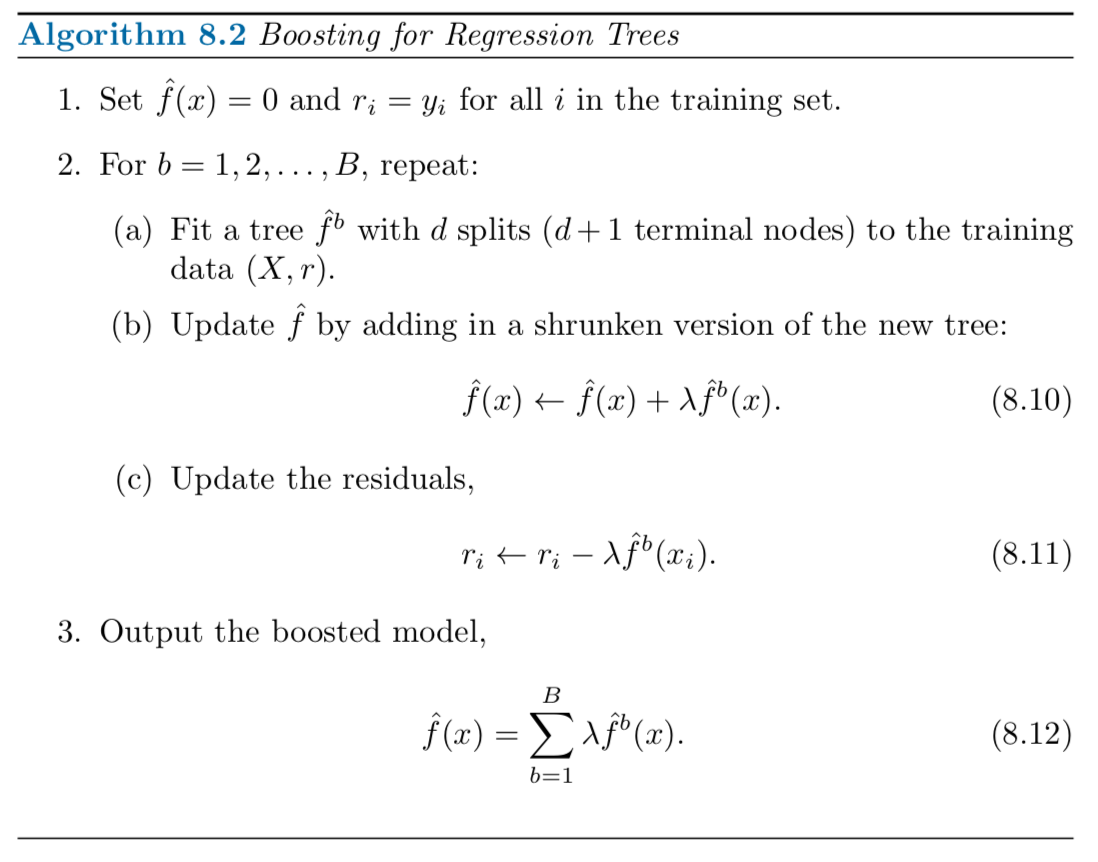

# Gradient boosting (3)

- Optimization in gradient boosting is a special kind of gradient descent

$$L(\Theta) = \sum L(y_i, f_\Theta(x_i))$$

- Gradient descent has the simple form

$$\Theta_{t} \leftarrow \Theta_{t-1}  - \lambda_{t-1} \nabla L$$

- But how to choose $\lambda$?

# Quadratic approximation

- 2nd degree series expansion around current value $\theta_{t-1}$

$ L(\theta) \approx \frac{1}{2} \left(\theta -\theta _{t-1}\right){}^2 L''\left(\theta
   _{t-1}\right)+\left(\theta -\theta _{t-1}\right) L'\left(\theta
   _{t-1}\right)+L\left(\theta _{t-1}\right)$
   
- We can find the value for which $\frac{dL(\theta)}{d\theta} = 0$

$$\theta _{t} \leftarrow \theta _{t-1}-\frac{L'\left(\theta _{t-1}\right)}{L''\left(\theta _{t-1}\right)}$$

# Line search (steepest gradient descent)

- Alternatively, we choose $\lambda_{t-1}$ so that

$$\lambda_{t-1} = \arg \min_\lambda L(\Theta_{t-1}  - \lambda \nabla L)$$


# Gradient boosting (cont'd)

- Gradient boosting can be seen as a direct attempt to minimize the loss by making the negative gradient zero
- For a new tree $T(x_i;\Theta)$, we try to find the parameters by solving
$$\Theta = \arg \min_\Theta \sum (-\nabla L - T(x_i;\Theta))^2$$
- Hence, we transform boosting into a simple squared loss minimization!

# Results
- 60% training, 20% validation, 10% testing.  

- Regularized logistic regression: 63% AUC.  

- Random forest: 84% AUC.  
<br>
<center><img src="./images/unit-09/unit-09-0_cscsrf18.png" width="100%" align="center"></center>

# Interpreting fits
<br>
<div class="container2">
  <div class="row2">
    <div class="col-5">
      <ul>
        <li>Logistic regression: easy</li>
        <br>
        <left><img src="./images/unit-09/unit-09-0_cscsrf19.png" width="100%" align="left"></left>
      </ul>        
    </div>
    <div class="col-7">
        <br>
        <br>
        <br>
        <p>$$p(y \mid X) = \frac{1}{1 + \exp(-(\theta_0 + \sum_{j>0} x_j\theta_j))}$$</p>
    </div>
  </div>      
</div>

# Interpreting fits (2)  

- Random forest: compute average reduction in loss across trees.  
<br>
<center><img src="./images/unit-09/unit-09-0_cscsrf20.png" width="100%" align="center"></center>

# Take home messages
- Sometimes we need non-linear decision boundaries.  

- Decision trees give this boundaries but have high variance.  

- We can reduce variance with bagging.  

- Because of bootstrap, trees become correlated, reducing effectiveness of bagging.  

- Random forest tries to decorrelate trees by subsampling features at each tree split.